In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
with open(file="cricket.txt",mode="r",encoding='utf-8') as file:
    cricket_history=file.read()

In [ ]:
len(cricket_history.split(" "))

In [ ]:
print(cricket_history[:500])

In [ ]:
tokenizer=tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([cricket_history])

In [ ]:
tokenizer.get_config()['filters']

In [ ]:
tokenizer.get_config()['word_counts']

In [ ]:
tokenizer.word_counts

In [ ]:
tokenizer.word_index

In [ ]:
input_sequences=[]
for sentence in cricket_history.split("\n"):
    token_list=tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(token_list)):
        input_sequences.append(token_list[:i+1])

input_sequences[:5]

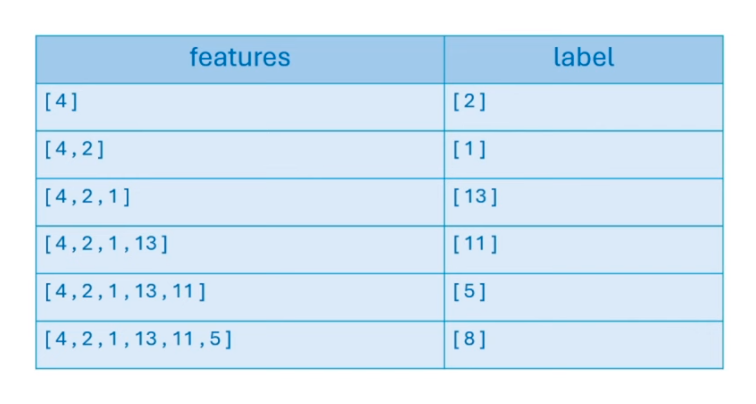

In [ ]:
max_length=max([len(sequence) for sequence in input_sequences])
max_length

In [ ]:
# all input features should have same same. 
input_sequences=tf.keras.preprocessing.sequence.pad_sequences(input_sequences,maxlen=max_length,padding='pre')
input_sequences[1]

In [ ]:
X=input_sequences[:,:-1]
y=input_sequences[:,-1]

In [ ]:
X[1]

In [ ]:
y[1]

In [ ]:
# number of classes
num_classes=len(tokenizer.word_index)+1

# ine hot encoding labels
y=tf.keras.utils.to_categorical(y,num_classes=num_classes)

In [ ]:
y[1]

In [ ]:
# model building
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=num_classes,output_dim=100,input_length=max_length-1))
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X,y,epochs=100,verbose=1)

In [ ]:
%%time
input_text="The match between India and Pakistan was very exciting and"
next_words=30
for i in range(next_words):
    token_list=tokenizer.texts_to_sequences([input_text])
    token_list=tf.keras.preprocessing.sequence.pad_sequences(token_list,
                                                        maxlen=max_length-1,
                                                        padding='pre')
    y_pred_token=np.argmax(model.predict(token_list,verbose=-1),axis=1)

    y_pred_word=tokenizer.index_word[y_pred_token[0]]
    input_text+=" "+y_pred_word

print(input_text)

In [ ]:
%%time
input_text="The match between India and Pakistan was very exciting and"
next_words=30
for _ in range(next_words):
    token_list=tokenizer.texts_to_sequences([input_text])[0]
    token_list=tf.keras.preprocessing.sequence.pad_sequences([token_list],maxlen=max_length-1,padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word=""
    for word,index in tokenizer.word_index.items():
        if index==predicted:
            output_word=word
            break
    input_text+=" "+output_word

print(input_text)

1/1 [==============================] - 0s 51ms/step



KeyboardInterrupt



In [ ]:
print(input_text)